In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm 

datos = pd.read_csv("nhanes_2015_2016.csv")

# Cuaderno de prácticas para intervalos de confianza utilizando datos de NHANES
Este cuaderno le dará la oportunidad de practicar el trabajo con intervalos de confianza utilizando los datos de NHANES.

Puede ingresar su código en las celdas que dicen "ingrese su código aquí" y puede escribir las respuestas a las preguntas en las celdas que dicen "Escriba Markdown y Latex".

Tenga en cuenta que la mayor parte del código que deberá escribir a continuación es muy similar al código que aparece en el cuaderno de estudio de caso. Tendrá que editar el código de ese bloc de notas en pequeñas formas para adaptarlo a las indicaciones a continuación.

Para comenzar, usaremos las mismas importaciones de módulos y leeremos los datos de la misma manera que lo hicimos en el caso de estudio:

### Pregunta 1
Restrinja la muestra a mujeres entre 35 y 50 años, luego use la variable de estado civil DMDMARTL para dividir esta muestra en dos grupos: mujeres que actualmente están casadas y mujeres que actualmente no están casadas. Dentro de cada uno de estos grupos, calcule la proporción de mujeres que terminaron la universidad. Calcule los intervalos de confianza del 95% para cada una de estas proporciones.

In [2]:
datos.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [3]:
datos["GENDER"] = datos.RIAGENDR.replace({1:"Hombre", 2:"Mujer"}) 
# crear un elemento de hombre o mujer más sencillo

datos["N_EDUCATION"] = datos.DMDEDUC2.replace({
    1:"Noveno",
    2:"Noveno-Undecimo - NoGrade",
    3:"Bachiller",
    4:"Pregrado",
    5:"Posgrado",
    7:"Rechaza",
    9:"No sabe"
        
})

datos["ESTADO_CIVIL"] = datos.DMDMARTL.replace({
    1:"Casado",
    2:"Viudo",
    3:"Divorciado",
    4:"Separado",
    5:"No Casado",
    6:"Union Libre",
    77:"No sabe"
    
}) 

df = datos.loc[(datos.RIDAGEYR >= 30) & (datos.RIDAGEYR < 50), ["DMDMARTL","GENDER","N_EDUCATION","ESTADO_CIVIL"]]

In [4]:
df = df.loc[datos.GENDER == "Mujer"]
df.shape

(992, 4)

In [5]:

dx = df.groupby(["N_EDUCATION",]).agg({"ESTADO_CIVIL": [lambda x: np.mean(x=="Casado"), 
                                                     lambda x: np.mean(x=="No Casado"), 
                                                     lambda x: sum(x=="Casado"), 
                                                     lambda x: sum(x=="No Casado")]})
dx.columns = ["Casado_mean", "NoCasado_mean", "Casado_count", "NoCasado_count"]

dx

,Casado_mean,NoCasado_mean,Casado_count,NoCasado_count
N_EDUCATION,,,,
Bachiller,0.457317,0.189024,75,31
Noveno,0.459184,0.163265,45,16
Noveno-Undecimo - NoGrade,0.469388,0.255102,46,25
Posgrado,0.675159,0.159236,212,50
Pregrado,0.528302,0.166667,168,53


In [6]:
dx = dx.loc[dx.index == "Pregrado"] 
z = norm.ppf(0.5+(0.95/2))
# separamos todos los datos de los demás, solo nos interesa las mujeres casadas en este caso

In [7]:
# error estandar sqrt((p_hat * (1 - p_hat))/n)

e_casadas = np.sqrt(dx.Casado_mean.Pregrado * (1 - dx.Casado_mean.Pregrado) / dx.Casado_count.Pregrado)
e_nocasadas = np.sqrt(dx.NoCasado_mean.Pregrado * (1 - dx.NoCasado_mean.Pregrado) / dx.NoCasado_count.Pregrado)


In [8]:
# intervalos de confianza (phat - z  * error_estandar)

intervalo_casadas = (
dx.Casado_mean.Pregrado - (z*e_casadas),
dx.Casado_mean.Pregrado + (z*e_casadas)    
    
) 
print(intervalo_casadas)

(0.45281585414535674, 0.6037879194395489)


In [9]:
intervalo_nocasadas = (
dx.NoCasado_mean.Pregrado - (z * e_nocasadas),
dx.NoCasado_mean.Pregrado + (z * e_nocasadas)

)

intervalo_nocasadas

(0.06633364126055258, 0.26699969207278074)

Q1a. Identifique cuál de los dos intervalos de confianza es más ancho y explique por qué es así.

In [10]:
# Casadas

0.6037879194395489 - 0.45281585414535674

0.15097206529419216

In [11]:
# No casadas

0.26699969207278074 - 0.06633364126055258

0.20066605081222816

El intervalo de confianza para la proporción de mujeres casadas presenta mayor amplitud, esto se debe a que si bien se presenta como una mejor estimación con una media de 0.52 frente a un 0.16 de las no casadas, y presenta una muestra más grande con 163 observaciones frente a las casadas con 53 observaciones, esta amplitud puede deberse a que dentro de la muestra hay mayor variabilidad lo que hace que haya dicha amplitud.

Q1b. Escriba 1-2 oraciones que resuman estos hallazgos para una audiencia que no sepa qué es un intervalo de confianza (el objetivo aquí es informar la sustancia de lo que aprendió sobre cómo se relacionan el estado civil y el nivel educativo, no enseñar a una persona qué es un intervalo de confianza). intervalo de confianza es).

Un intervalo de confianza es un rango de valores en donde puede caer una estimación poblacional de interés, para este caso, utilizamos un intervalo de proporciones que nos muestra la probabilidad de mujeres casadas y no casadas que tienen un nivel educativo universitario, en esta medida, vemos que la mejor estimación es de las mujeres casadas, es decir el promedio más alto y también vemos que en esta estimación hay una mayor muestra, así, que el intervalo de confianza nos da con cierto grado de certeza unos parametros que nos indican en que rango puede caer el valor real de la población si es que pudieramos repetir en muchas ocasiones esta muestra de forma aleatoria, entonces, cada que se repitiera esta muestra, la media muestral tendría con un 95% de confianza que caer en los rangos antes evidenciados, eso no quiere decir que tenga que caer precisamente en el centro del rango de confianza. Igualmente, puede que si repitieramos estas muestras 100 o 1000 veces, algunos de los resultados pudieran estar por fuera de ese rango, esto se debe a la significancia con la que hemos trabajado que es del 0.05 lo que indica que es posible que los datos puedan estar por fuera de nuestro intervalo en algún momento. 

En sintesis el intervalo de confianza nos da cierta certeza de donde podría caer el dato verdadero poblacional o parametro de interes, no obstante, este intervalo depende también del tamaño de la muestra y la variabilidad de la misma, entre mayor sea la muestra, también podremos trabajar con lo indicado en el teorema de limite central. 

## Pregunta 2
Construya un intervalo de confianza del 95% para la proporción de mujeres fumadoras. Construya un intervalo de confianza del 95% para la proporción de fumadores que son hombres. Construya un intervalo de confianza del 95% para la diferencia entre esas dos proporciones de género.

In [12]:
datos["SMOKERS"] = datos.SMQ020.replace({1:"Si",2:"No", 7:np.nan, 9:np.nan})

df = datos.loc[:,["SMOKERS","GENDER"]].dropna()

In [22]:
fumadores = df.groupby("GENDER").agg({"SMOKERS":[lambda x: np.mean(x=="Si"), np.size],
                                     "SMOKERS":[lambda x: np.std(x=="Si"), np.size]
                                     
                                     })
fumadores.columns = ["Proporcion","Muestra"]
fumadores

,Proporcion,Muestra
GENDER,,
Hombre,0.499824,2753
Mujer,0.460342,2972


In [25]:
fumadores = df.groupby("GENDER").agg({"SMOKERS":[lambda x: np.mean(x=="Si"), 
                                                 lambda x: np.std(x=="Si"), 
                                                 np.size]})
fumadores.columns = ["Proporcion","Desviacion_estandar","Muestra"]
fumadores

,Proporcion,Desviacion_estandar,Muestra
GENDER,,,
Hombre,0.513258,0.499824,2753
Mujer,0.304845,0.460342,2972


In [27]:
p_male = fumadores.Proporcion.Hombre
p_female = fumadores.Proporcion.Mujer

std_male = fumadores.Desviacion_estandar.Hombre
std_male = fumadores.Desviacion_estandar.Mujer

In [28]:
# error estandar sqrt((p_hat * (1 - p_hat))/n)
e_male = np.sqrt(p_male * (1-p_male)/fumadores.Muestra.Hombre)
e_female = np.sqrt(p_female * (1-p_female)/fumadores.Muestra.Mujer)

In [29]:
# intervalo con norm.interval

confianza_1 = norm.interval(confidence=0.95, loc=p_male, scale=e_male)
confianza_2 = norm.interval(confidence=0.95, loc=p_female, scale=e_female)

e_juntos = np.sqrt(e_male**2 + e_female**2)

confianza_partes = norm.interval(confidence=0.95, loc= p_male - p_female, scale=e_juntos)



In [34]:
print(confianza_1)
print(confianza_2)
print(confianza_partes)



(0.49458749263718593, 0.5319290347874418)
(0.28829498798612146, 0.3213954561592352)
(0.18346293260460997, 0.2333631506746611)


0.04990021807005113

Q2a. ¿Por qué podría ser relevante informar las proporciones de género separadas y la diferencia entre las proporciones de género?

Porque puede haber enfoque de análisis en el que se usa la mejor estimación, de esta medida cuando trabajamos con este enfoque utilizamos el p_hat de esa proporción para crear los intervalos y hacer las inferencias correspondientes. Ahora, es importante para este caso informar el género porque es un parametro de interés que busca analizarse y esta variable tiene impacto en las proporciones evidenciadas. 

**La información separada por género nos permite hacer comparaciones y contrastes entre hombres y mujeres y detectar posibles diferencias significativas en sus comportamientos. Además, la diferencia entre las proporciones de género nos permite identificar si existe una posible asociación entre la variable de interés (fumar) y el género. Todo esto es relevante para comprender mejor el fenómeno estudiado y obtener conclusiones más precisas y útiles.**

Q2b. ¿Cómo se compara el ancho del intervalo de confianza para la diferencia entre las proporciones de género con el ancho de los intervalos de confianza para las proporciones de género separadas?


Podemos comparar los intervalos restando limite inferior y limite superior de cada  uno de ellos

**Hombres fumadores**

> 0.5319290347874418 - 0.49458749263718593 = 0.03734154215025587

**Mujeres fumadoras**
> 0.3213954561592352 - 0.28829498798612146 = 0.03310046817311374

**Diferencia Intervalo**
>0.2333631506746611 -  0.18346293260460997 = 0.04990021807005113

Lo que podemos observar es que los intervalos separados, vemos que existe un mayor ancho en el intervalo, el intervalo más amplio es el de mujeres que puede estar asociado a que fuman en una menor proporción y su muestra es mucho más pequeña que los otros intervalos. Finalmente el intervalo diferencia tiene el menor ancho de todos los intervalos y puede deberse a que trabaja con toda la población, no obstante, en este se estan viendo a hombres y mujeres. 

**Además, en términos de la interpretación de los resultados, el intervalo de confianza para la diferencia de proporciones de género es útil para comparar las proporciones de género y determinar si hay una diferencia estadísticamente significativa entre ellas. Por otro lado, los intervalos de confianza para las proporciones de género separadas son útiles para entender la distribución de las proporciones en cada grupo.**

En resumen, los tres intervalos de confianza son importantes para obtener información sobre las proporciones de género y su diferencia, pero cada uno proporciona diferentes tipos de información y debe ser interpretado en consecuencia

Complemento: La significancia estadística se refiere a la probabilidad de que los resultados obtenidos en una prueba o análisis estadístico sean debido al azar o a la variabilidad natural de los datos, en lugar de ser un resultado real y significativo. En otras palabras, la significancia estadística se refiere a la probabilidad de que la diferencia observada entre dos grupos o muestras no se deba a la casualidad o al azar, sino a una diferencia real entre los grupos o muestras.

En el caso de los intervalos de confianza que has calculado, se puede decir que la diferencia entre las proporciones de género en cuanto a fumadores es estadísticamente significativa si el intervalo de confianza de la diferencia no incluye cero. Es decir, si el intervalo de confianza de la diferencia entre las proporciones de género excluye el valor cero, se puede decir que la diferencia es estadísticamente significativa. Por otro lado, si el intervalo de confianza de la diferencia incluye el valor cero, se puede decir que no hay evidencia suficiente para afirmar que la diferencia es estadísticamente significativa.

En cuanto al ancho del intervalo de diferencia, si bien es importante tener en cuenta el ancho del intervalo, es posible que no siempre sea una medida adecuada para evaluar la significancia estadística. En algunos casos, un intervalo más ancho puede ser necesario para obtener una estimación precisa de la diferencia, mientras que en otros casos, un intervalo más estrecho puede ser suficiente para detectar una diferencia significativa. En este caso, lo importante es evaluar si el intervalo de confianza de la diferencia incluye o no el valor cero para determinar si la diferencia es estadísticamente significativa o no.

## Pregunta 3
Construya un intervalo de 95% para la altura (BMXHT) en centímetros. Luego convierta la altura de centímetros a pulgadas dividiendo por 2,54 y construya un intervalo de confianza del 95 % para la altura en pulgadas. Finalmente, convierta los puntos finales (los límites de confianza inferior y superior) del intervalo de confianza de pulgadas a centímetros.

In [45]:
dx = datos.loc[:,"BMXHT"].dropna().to_frame()
dx["PULGADAS"] = dx["BMXHT"] * 2.54

In [50]:
from statsmodels.stats.weightstats import DescrStatsW

print(DescrStatsW(dx["BMXHT"]).zconfint_mean())
print(DescrStatsW(dx["PULGADAS"]).zconfint_mean())


print(165.88055125872887*2.54, 166.40511769949427*2.54 )


(421.3366001971714, 422.66899895671554)
(165.88055125872887, 166.40511769949427)
421.3366001971713 422.6689989567154


Q3a. Describa cómo se relaciona el intervalo de confianza construido en centímetros con el intervalo de confianza construido en pulgadas.

In [53]:
print(166.40511769949427 -165.88055125872887 )
print(166.40511769949427*2.54 - 165.88055125872887*2.54 )

0.5245664407653976
1.3323987595441054


En que el intervalo se mantiene igual de ancho, si bien el intervalo en pulgadas pareciera menos amplio, este mantiene el mismo ancho que el primero, pero al ser su unidad de medida mayor pareciera mayor, pero conservan las dos su ancho. 

## Pregunta 4

Divida la muestra con base en franjas de edad de 10 años, es decir, los grupos resultantes consistirán en personas con edades entre 18 y 28, 29 y 38, etc. Construya intervalos de confianza del 95 % para la diferencia entre el IMC medio para mujeres y hombres dentro de cada franja de edad.

In [76]:
datos["EDAD"] = pd.cut(datos.RIDAGEYR, [18,28,38,48,58,68,78,88])

df = datos.loc[:, ["GENDER", "EDAD","BMXBMI"]].dropna()

dx = df.groupby(["EDAD","GENDER"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()

dx["DIFERENCIA_MEDIAS"] = dx.loc[:, ('BMXBMI', 'mean', 'Mujer')] - dx.loc[:, ('BMXBMI', 'mean', 'Hombre')]
dx

BMXBMI                                              \
               mean                  std             size         
GENDER       Hombre      Mujer    Hombre     Mujer Hombre Mujer   
EDAD                                                              
(18, 28]  27.058186  28.019433  6.679515  8.048854    452   494   
(28, 38]  29.697180  29.943443  6.726690  7.959097    461   488   
(38, 48]  29.514646  31.003733  6.104950  8.044642    396   509   
(48, 58]  29.385132  30.787361  6.151534  7.647590    417   451   
(58, 68]  29.232462  31.054664  5.959024  7.779502    459   461   
(68, 78]  28.720270  30.537818  5.336652  6.780588    296   275   
(78, 88]  27.464368  27.850000  4.695650  5.483781    174   198   

         DIFERENCIA_MEDIAS  
                            
GENDER                      
EDAD                        
(18, 28]          0.961247  
(28, 38]          0.246263  
(38, 48]          1.489086  
(48, 58]          1.402230  
(58, 68]          1.822202  
(68, 78]          1.817548  
(78, 88]          0.385632

In [77]:
dx.columns

MultiIndex([(           'BMXBMI', 'mean', 'Hombre'),
            (           'BMXBMI', 'mean',  'Mujer'),
            (           'BMXBMI',  'std', 'Hombre'),
            (           'BMXBMI',  'std',  'Mujer'),
            (           'BMXBMI', 'size', 'Hombre'),
            (           'BMXBMI', 'size',  'Mujer'),
            ('DIFERENCIA_MEDIAS',     '',       '')],
           names=[None, None, 'GENDER'])

In [85]:
# error estandar por género
dx["BMXBMI", "e_estandar", "Mujer"] = dx["BMXBMI","std","Mujer"]/np.sqrt(dx["BMXBMI","size","Mujer"])
dx["BMXBMI", "e_estandar", "Hombre"] = dx["BMXBMI","std","Hombre"]/np.sqrt(dx["BMXBMI","size","Hombre"])

# diferencia error estandar por género e_estimado_partes1 = np.sqrt(e_mujer**2 + e_hombre**2)

dx["BMXBMI", "e_std_diferencia", ""] = np.sqrt(dx["BMXBMI","e_estandar","Mujer"]**2 + dx["BMXBMI","e_estandar","Hombre"]**2)

# calculando z

z = norm.ppf(0.5+(0.95/2))

# Intervalos # mean_dif - (z * e_estimado_partes1)

# Inferior

dx["BMXBMI","Inf_dif",""] = dx[('DIFERENCIA_MEDIAS','','')] - (z * dx["BMXBMI", "e_std_diferencia", ""])

# superior
dx["BMXBMI","Sup_dif",""] = dx[('DIFERENCIA_MEDIAS','','')] + (z * dx["BMXBMI", "e_std_diferencia", ""])
dx

BMXBMI                                              \
               mean                  std             size         
GENDER       Hombre      Mujer    Hombre     Mujer Hombre Mujer   
EDAD                                                              
(18, 28]  27.058186  28.019433  6.679515  8.048854    452   494   
(28, 38]  29.697180  29.943443  6.726690  7.959097    461   488   
(38, 48]  29.514646  31.003733  6.104950  8.044642    396   509   
(48, 58]  29.385132  30.787361  6.151534  7.647590    417   451   
(58, 68]  29.232462  31.054664  5.959024  7.779502    459   461   
(68, 78]  28.720270  30.537818  5.336652  6.780588    296   275   
(78, 88]  27.464368  27.850000  4.695650  5.483781    174   198   

         DIFERENCIA_MEDIAS     BMXBMI                                       \
                           e_estandar           e_std_diferencia   Inf_dif   
GENDER                          Mujer    Hombre                              
EDAD                                                                         
(18, 28]          0.961247   0.362135  0.314178         0.479426  0.021589   
(28, 38]          0.246263   0.360291  0.313293         0.477454 -0.689530   
(38, 48]          1.489086   0.356572  0.306785         0.470384  0.567151   
(48, 58]          1.402230   0.360111  0.301242         0.469496  0.482034   
(58, 68]          1.822202   0.362328  0.278143         0.456777  0.926936   
(68, 78]          1.817548   0.408885  0.310187         0.513228  0.811640   
(78, 88]          0.385632   0.389715  0.355976         0.527823 -0.648882   

                    
           Sup_dif  
GENDER              
EDAD                
(18, 28]  1.900906  
(28, 38]  1.182056  
(38, 48]  2.411022  
(48, 58]  2.322425  
(58, 68]  2.717468  
(68, 78]  2.823455  
(78, 88]  1.420146

Q4a. ¿Cómo difieren los anchos de estos intervalos de confianza? Proporcione una explicación de cualquier diferencia sustancial en los anchos de los intervalos de confianza que observe.

In [86]:
dx["BMXBMI","dif_inter",""] = dx["BMXBMI","Sup_dif",""] - dx["BMXBMI","Inf_dif",""]
dx["BMXBMI","dif_inter",""]

EDAD
(18, 28]    1.879317
(28, 38]    1.871586
(38, 48]    1.843872
(48, 58]    1.840391
(58, 68]    1.790532
(68, 78]    2.011815
(78, 88]    2.069028
Name: (BMXBMI, dif_inter, ), dtype: float64

En los rangos de 18-28 hasta el 38 - 48 no presentan una diferencia en su ancho tan notable, posteriormente en el rango  58 - 88 hace que el ancho vaya aumentando sucesivamente en el intervalo. 

**Correcto, los anchos de los intervalos de confianza aumentan a medida que aumenta la edad. Esto puede deberse a varios factores. Por ejemplo, a medida que envejecemos, es más probable que las personas tengan diferentes afecciones médicas y tomen diferentes medicamentos, lo que puede afectar su IMC. Además, a medida que envejecemos, nuestro metabolismo disminuye y podemos perder masa muscular, lo que también puede afectar nuestro IMC. En general, cuanto más grande es la muestra, más precisa es la estimación de la media y, por lo tanto, más estrecho es el intervalo de confianza. En este caso, las muestras en los grupos de edad más avanzada son más pequeñas, lo que puede explicar por qué los intervalos de confianza son más anchos.**

### Pregunta 5
Construya un intervalo de confianza del 95 % para la primera y la segunda medición de la presión arterial sistólica y para la diferencia entre la primera y la segunda medición de la presión arterial sistólica en un sujeto.

In [87]:
datos.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'GENDER', 'N_EDUCATION', 'ESTADO_CIVIL',
       'SMOKERS', 'EDAD'],
      dtype='object')

In [90]:
df = datos.loc[:,["BPXSY1", "BPXSY2"]].dropna()

# primer intervalo BPXSY1 

print(DescrStatsW(df["BPXSY1"]).zconfint_mean())

# Segundo intervalo BPXSY2

print(DescrStatsW(df["BPXSY2"]).zconfint_mean())

(124.59378718804363, 125.5831545143218)
(123.92688534371334, 124.90008429681563)


In [103]:
# e_estimado_partes1 = np.sqrt(e_mujer**2 + e_hombre**2)

mean1 = df.BPXSY1.mean()
mean2 = df.BPXSY2.mean()
std1 = df.BPXSY1.std()
std2 = df.BPXSY2.std()

# diferencia media 

m_diff = mean1 - mean2

# error estandar std_muestra/sqrt(n)

e1 = std1/np.sqrt(df.BPXSY1.size)
e2 = std2/np.sqrt(df.BPXSY2.size)

# diferencia error estandar e_estimado_dif = np.sqrt(e_estimado1**2 + e_estimado2**2)

e_diff = np.sqrt(e1**2 + e2**2)

# intervalo diferencias (media_muestral1 - media_muestral2) ± z*(sqrt((std_muestral1^2/n1) + (std_muestral2^2/n2)))

intervalos = (
    
    m_diff - z*(np.sqrt((std1 ** 2/df.BPXSY1.size) + (std2**2/df.BPXSY2.size))),
    m_diff + z*(np.sqrt((std1 ** 2/df.BPXSY1.size) + (std2**2/df.BPXSY2.size)))
)
intervalos

(-0.018909477898867322, 1.368881539735335)

Q5a. Con base en estos intervalos de confianza, ¿diría que una diferencia de cero entre los valores medios de la población de la primera y segunda medidas de presión arterial sistólica es consistente con los datos?


In [113]:
from scipy.stats import pearsonr

a = pearsonr(df.BPXSY1, df.BPXSY2)
print("P Value: {:.15f}".format(a[1]))
print(a[0])

P Value: 0.000000000000000
0.9622872947976285


La respuesta es no porque en el marco de los datos observamos que si bien se incluye el 0 dentro del intervalo de confianza, el pvalue es consistente en que existe una correlación positiva y si esa diferencia fuera 0 significaría que no hay correlación, ahora, no es posible descartar que el valor real sea 0 porque ese es un rango presente en el intervalo, no obstante también podría darse un valor positivo, o un valor negativo de 0, es decir un -0.018

In [114]:
print(125.5831545143218-124.59378718804363 )
print(124.90008429681563-123.92688534371334 )

0.9893673262781704
0.9731989531022975


P5b. Discuta cómo se compara el ancho del intervalo de confianza para la diferencia dentro del sujeto con el ancho de los intervalos de confianza para la primera y la segunda medida.

In [115]:
print(125.5831545143218-124.59378718804363 )
print(124.90008429681563-123.92688534371334 )
(1.368881539735335 -(-0.018909477898867322))

0.9893673262781704
0.9731989531022975


1.3877910176342025

El ancho de los intervalos 1 y 2 de presion sistolica son consistentes con diferencia de casi una unidad, es decir, se mantiene el ancho, no obstante, para el caso del intervalo de diferencias, podemos ver un intervalo más reducido, es decir mucho más preciso. 

## Pregunta 6
Construya un intervalo de confianza del 95% para la diferencia media entre la edad promedio de un fumador y la edad promedio de un no fumador.



In [139]:
df = datos.loc[:,["GENDER","RIDAGEYR", "SMOKERS"]]

dx = df.groupby(["RIDAGEYR"]).agg({"SMOKERS":[lambda x: np.mean(x=="Si"),
                                              lambda x: np.std(x=="Si", ddof=0), 
                                              np.size, lambda x: np.mean(x=="No"),
                                              lambda x: np.std(x=="No", ddof=0), 
                                              np.size
                                             ]
                                  })
dx.columns = ["mean_si","std_si","n_si","mean_no","std_no","n_no"]
dx["n_dif"] = dx["mean_si"] - dx["mean_no"]
dx

,mean_si,std_si,n_si,mean_no,std_no,n_no,n_dif
RIDAGEYR,,,,,,,
18,0.052632,0.223297,133,0.947368,0.223297,133,-0.894737
19,0.171875,0.377272,128,0.828125,0.377272,128,-0.656250
20,0.215190,0.410954,79,0.784810,0.410954,79,-0.569620
21,0.305085,0.460443,59,0.694915,0.460443,59,-0.389831
22,0.284211,0.451038,95,0.715789,0.451038,95,-0.431579
...,...,...,...,...,...,...,...
76,0.431818,0.495329,44,0.568182,0.495329,44,-0.136364
77,0.581395,0.493330,43,0.418605,0.493330,43,0.162791
78,0.404255,0.490747,47,0.574468,0.494423,47,-0.170213


In [134]:
# error estandar std_muestra/sqrt(n)

dx["e_si"] =    dx["std_si"]/np.sqrt(dx.n_si)
dx["e_no"] =    dx["std_no"]/np.sqrt(dx.n_no)

# diferencia error estandar e_estimado_dif = np.sqrt(e_estimado1**2 + e_estimado2**2)

dx["e_diff"] = np.sqrt(dx["e_si"]**2 + dx["e_no"]**2)

# # intervalo diferencias (media_muestral1 - media_muestral2) ± z*(sqrt((std_muestral1^2/n1) + (std_muestral2^2/n2)))



In [144]:
dx["i_inf"] = dx.n_dif - z*(np.sqrt((dx.std_si ** 2/dx.n_si) + (dx.std_no**2/dx.n_no)))
dx["i_sup"] = dx.n_dif + z*(np.sqrt((dx.std_si ** 2/dx.n_si) + (dx.std_no**2/dx.n_no)))


In [145]:
dx

,mean_si,std_si,n_si,mean_no,std_no,n_no,n_dif,i_inf,i_sup
RIDAGEYR,,,,,,,,,
18,0.052632,0.223297,133,0.947368,0.223297,133,-0.894737,-0.948405,-0.841068
19,0.171875,0.377272,128,0.828125,0.377272,128,-0.656250,-0.748680,-0.563820
20,0.215190,0.410954,79,0.784810,0.410954,79,-0.569620,-0.697777,-0.441463
21,0.305085,0.460443,59,0.694915,0.460443,59,-0.389831,-0.555985,-0.223676
22,0.284211,0.451038,95,0.715789,0.451038,95,-0.431579,-0.559846,-0.303312
...,...,...,...,...,...,...,...,...,...
76,0.431818,0.495329,44,0.568182,0.495329,44,-0.136364,-0.343345,0.070618
77,0.581395,0.493330,43,0.418605,0.493330,43,0.162791,-0.045738,0.371320
78,0.404255,0.490747,47,0.574468,0.494423,47,-0.170213,-0.369371,0.028946


Q6a. Utilice técnicas gráficas y numéricas para comparar la variación en las edades de los fumadores con la variación en las edades de los no fumadores.

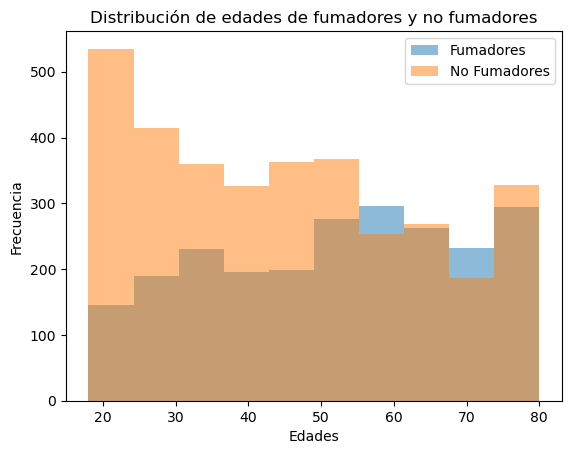

In [146]:
# Diferencia entre generos por fumadores 
import matplotlib.pyplot as plt

# Histograma de edades de fumadores
plt.hist(df[df["SMOKERS"]=="Si"]["RIDAGEYR"], alpha=0.5, label="Fumadores")
# Histograma de edades de no fumadores
plt.hist(df[df["SMOKERS"]=="No"]["RIDAGEYR"], alpha=0.5, label="No Fumadores")

plt.legend(loc="upper right")
plt.xlabel("Edades")
plt.ylabel("Frecuencia")
plt.title("Distribución de edades de fumadores y no fumadores")
plt.show()


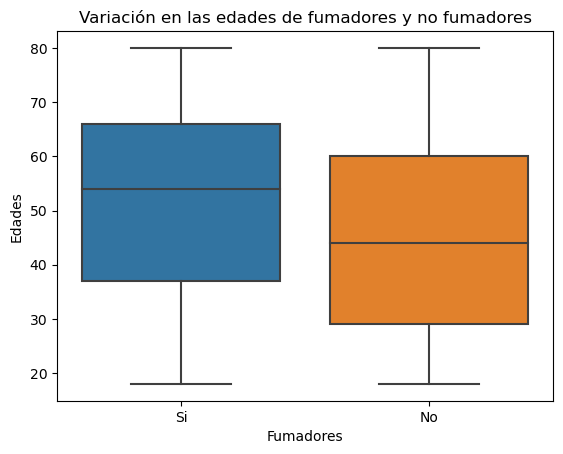

In [147]:
import seaborn as sns

# Boxplot de edades de fumadores y no fumadores
sns.boxplot(x="SMOKERS", y="RIDAGEYR", data=df)
plt.xlabel("Fumadores")
plt.ylabel("Edades")
plt.title("Variación en las edades de fumadores y no fumadores")
plt.show()


In [148]:
std_fumadores = df[df["SMOKERS"]=="Si"]["RIDAGEYR"].std()
std_no_fumadores = df[df["SMOKERS"]=="No"]["RIDAGEYR"].std()

print("Desviación estándar de las edades de fumadores:", std_fumadores)
print("Desviación estándar de las edades de no fumadores:", std_no_fumadores)


Desviación estándar de las edades de fumadores: 17.461140920034683
Desviación estándar de las edades de no fumadores: 18.54328622905512


¿Parece que la incertidumbre sobre la edad media de los fumadores o la incertidumbre sobre la edad media de los no fumadores contribuyeron más a la incertidumbre de la diferencia media en la que nos estamos centrando aquí?

Los no fumadores tienen una mayor incertidumbre lo que hace que haya mayor variabilidad, además su muestra es mucho más pequeña que la de los fuma